### Import Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics

### Read the dataset:


In [ ]:
data = pd.read_csv('car.data.csv')
#We can check the first five samples of the data:
data.head(5)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### Dimension of the data

In [ ]:
data.shape

(1728, 7)

In [ ]:
data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

### Check Missing Values

In [ ]:
data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

Comment: the dataset does not contain any missing values.

In [ ]:
data['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

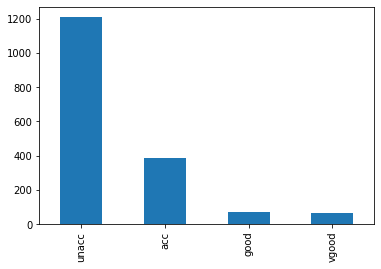

In [ ]:
data['class'].value_counts().plot(kind = 'bar')
plt.show()

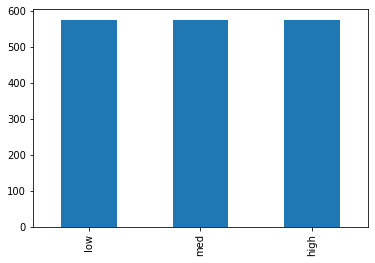

In [ ]:
data['safety'].value_counts().plot(kind = 'bar')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


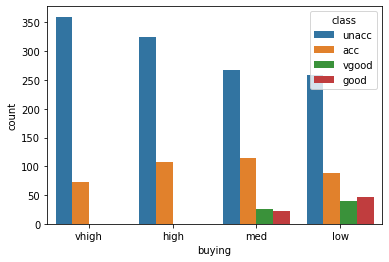

In [ ]:
import seaborn as sns
sns.countplot(data['buying'], hue = data['class'])
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


### Data Preprocessing

We must separate independent (X) and target (y) variables for further analysis. We drop the target variable “class” to form X and also define class as the target variable.

In [ ]:
X = data.drop(['buying'], axis = 1)
y = data['buying']

First, we define the categories of each of the variables in ascending order. We will be using a sklearn package for this task- OrdinalEncoder using a given list of categories. For instance, after the conversion, the values of buying_price_category will convert into [0, 1, 2, 3] from [‘low’, ‘med’, ‘high’, ‘vhigh’] and for the variable doors: after the conversion of the categories will be: [‘2’, ‘3’, ‘4’, ‘5more’] → [0, 1, 2, 3]

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
maint_cost_category = ['low', 'med', 'high', 'vhigh']
doors_category = ['2', '3', '4', '5more']
person_capacity_category = ['2', '4', 'more']
lug_boot_category = ['small', 'med', 'big']
safety_category = ['low', 'med', 'high']
class_category = ['unacc', 'acc', 'good', 'vgood']
all_categories = [maint_cost_category,doors_category,person_capacity_category,lug_boot_category,safety_category, class_category]
oe = OrdinalEncoder(categories= all_categories)
X = oe.fit_transform( data[['maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']])

### Train-test data splitting

Dividing the dataset into train and test data where train data will be used for training the model and test data will be used for evaluating the model. Here, we divide the dataset into 70% : 30% for training and test data, respectively.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

### Model Development

#### Train Decision tree classifier

We train the decision tree classifier in sklearn with the X_train and y_train data. Before starting the training process, we can set the value of different hyperparameters such as criterion, max_depth (maximum depth of the tree), .min_samples_split (the minimum number of samples required to split an internal node). etc..

In [ ]:
DT_classifier = DecisionTreeClassifier( criterion= 'gini', max_depth= 3, min_samples_split= 5)
DT_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=5)

### Experimental Results

#### Prediction

In [ ]:
y_pred = DT_classifier.predict(X_test)

We use a confusion matrix for finding the performance of the model:

In [ ]:
confusion_matrix(y_test, y_pred)

array([[41,  0, 16, 72],
       [46, 14, 26, 48],
       [48, 11, 20, 49],
       [48,  0,  0, 80]])

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        high       0.22      0.32      0.26       129
         low       0.56      0.10      0.18       134
         med       0.32      0.16      0.21       128
       vhigh       0.32      0.62      0.42       128

    accuracy                           0.30       519
   macro avg       0.36      0.30      0.27       519
weighted avg       0.36      0.30      0.27       519



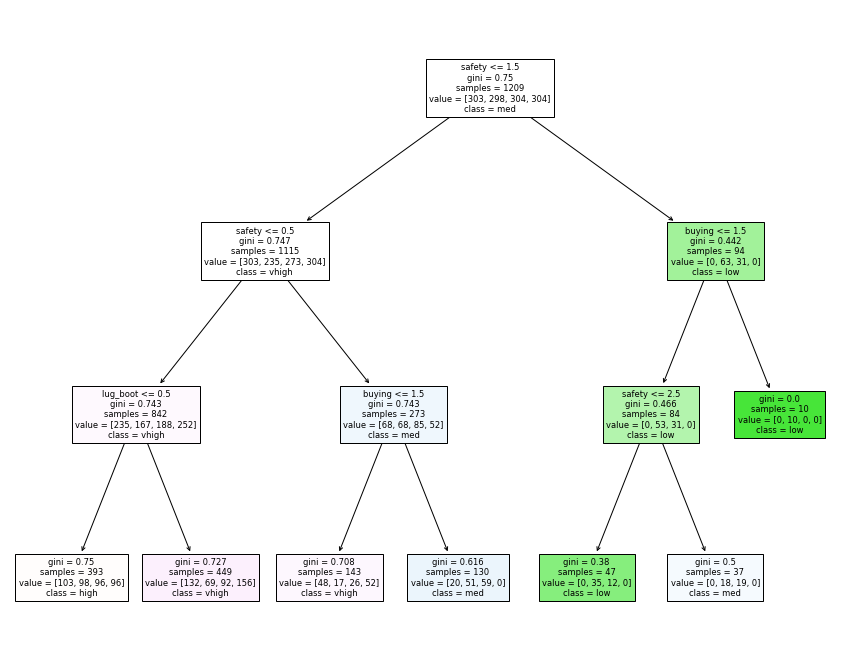

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(15,12))
_ = tree.plot_tree(DT_classifier,
feature_names=data.columns[:-1],
class_names= DT_classifier.classes_, filled=True)

In [ ]:
data = [[3,3,1,3,3,3],[3,3,2,3,3,3],[3,3,3,3,3,3]]
z_test = pd.DataFrame(data)
z_pred = DT_classifier.predict(z_test)

In [ ]:
print(z_pred)

['low' 'low' 'low']
